In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df0=pd.read_csv('Estacionkino.dat',sep=',')

In [18]:
df = pd.DataFrame(df0)

In [19]:
df['FECHA'] = pd.to_datetime(df0['TIMESTAMP'])



In [20]:
df.head()
df.dtypes
df = df[(df['FECHA'] >= "2018-11-1")]
df= df.reset_index(drop=True)
df.head()

,TIMESTAMP,RECORD,batt_volt_Min,logger_temp,short_up_Avg,short_dn_Avg,long_up_Avg,long_dn_Avg,cnr4_T_C_Avg,cnr4_T_K_Avg,...,Result3_Avg,Result4_Avg,Result5_Avg,Result6_Avg,Result7_Avg,Result8_Avg,Result9_Avg,Riego_mm_Tot,Perco_mm_Tot,FECHA
0,2018-11-01 00:00:00,32915,11.46,10.41,-1.902244,3.745140,-64.18308,-1.173059,10.162510,283.3125,...,26.19,79.07,0.052,15.47,18.84,15.86,18.57,0.0,0,2018-11-01 00:00:00
1,2018-11-01 00:10:00,32916,11.46,10.14,-1.833092,3.368093,-63.96626,-1.446764,10.041400,283.1914,...,26.18,79.06,0.052,15.47,18.84,15.86,18.57,0.0,0,2018-11-01 00:10:00
2,2018-11-01 00:20:00,32917,11.45,9.87,-1.747131,3.755410,-63.32391,-1.014551,9.860920,283.0109,...,26.19,79.08,0.052,15.48,18.83,15.86,18.57,0.0,0,2018-11-01 00:20:00
3,2018-11-01 00:30:00,32918,11.45,9.63,-1.317379,3.725501,-62.86656,-0.669219,9.725675,282.8756,...,26.18,79.07,0.052,15.51,18.79,15.89,18.53,0.0,0,2018-11-01 00:30:00
4,2018-11-01 00:40:00,32919,11.44,9.42,-2.096859,2.007489,-64.50862,-2.922203,10.017890,283.1679,...,26.16,79.03,0.052,15.66,18.60,16.05,18.34,0.0,0,2018-11-01 00:40:00


In [21]:
Tabla= df.filter(['FECHA','AirTC_Avg'])

In [22]:
Tabla["HORA"]=Tabla["FECHA"].dt.hour
Tabla["DIA"]=Tabla["FECHA"].dt.day
Tabla["MES"]=Tabla["FECHA"].dt.month
Tabla["AÑO"]=Tabla["FECHA"].dt.year

In [23]:
Tabla.head()

,FECHA,AirTC_Avg,HORA,DIA,MES,AÑO
0,2018-11-01 00:00:00,9.13,0,1,11,2018
1,2018-11-01 00:10:00,8.89,0,1,11,2018
2,2018-11-01 00:20:00,8.66,0,1,11,2018
3,2018-11-01 00:30:00,8.52,0,1,11,2018
4,2018-11-01 00:40:00,8.47,0,1,11,2018


In [24]:
def utf24(x):
    global resultado
    if(x<1.5):
        resultado =0
    elif(x>1.5 and x<=2.4):
        resultado =0.5
    elif(x>2.4 and x<=9.1):
        resultado =1
    elif(x>9.1 and x<=12.4):
        resultado=0.5    
    elif(x>12.4 and x<=15.9):
        resultado =0
    elif(x>15.9 and x<=18):
        resultado =-0.5
    elif(x>18):
        resultado  =-1
    return resultado

In [25]:
def HF1(x):
    if(0<x<=10):
        resultado=1
    else:
        resultado=0
    return resultado

In [26]:
def HC1(x):
    if(x>=25):
        resultado=1
    else:
        resultado=0
    return resultado

In [27]:
UF = []
HF = []
HC = []
HFM = []
mean= Tabla["AirTC_Avg"].tolist()
for i in range(0,len(mean)):
    UF.append(utf24(mean[i]))
    HF.append(HF1(mean[i]))
    HC.append(HC1(mean[i]))
    HFM.append(HF[i] - HC[i])

In [28]:
Tabla["UF"]=UF
Tabla["HF"]=HFM


In [37]:
SUMAUF = Tabla.groupby([Tabla["AÑO"],Tabla["MES"],Tabla["DIA"]])['AirTC_Avg'].agg({"max","min","mean"})
SUMAUF1 = Tabla.groupby([Tabla["AÑO"],Tabla["MES"],Tabla["DIA"]])['UF'].agg({"sum"})
SUMAUF2 = Tabla.groupby([Tabla["AÑO"],Tabla["MES"],Tabla["DIA"]])['HF'].agg({"sum"})



In [39]:
SUMAUF["UF"]=SUMAUF1["sum"]
SUMAUF["HF"]=SUMAUF2["sum"]


In [44]:
data=pd.date_range('11/01/2018 00:00:00', '02/18/2019 06:00:00 ', freq='D')
SUMAUF["FECHA"] = data
HFEcum = SUMAUF['HF'].cumsum()
UF24cum = SUMAUF['UF'].cumsum()
SUMAUF["UFCUM"]=UF24cum
SUMAUF["HFCUM"]=HFEcum


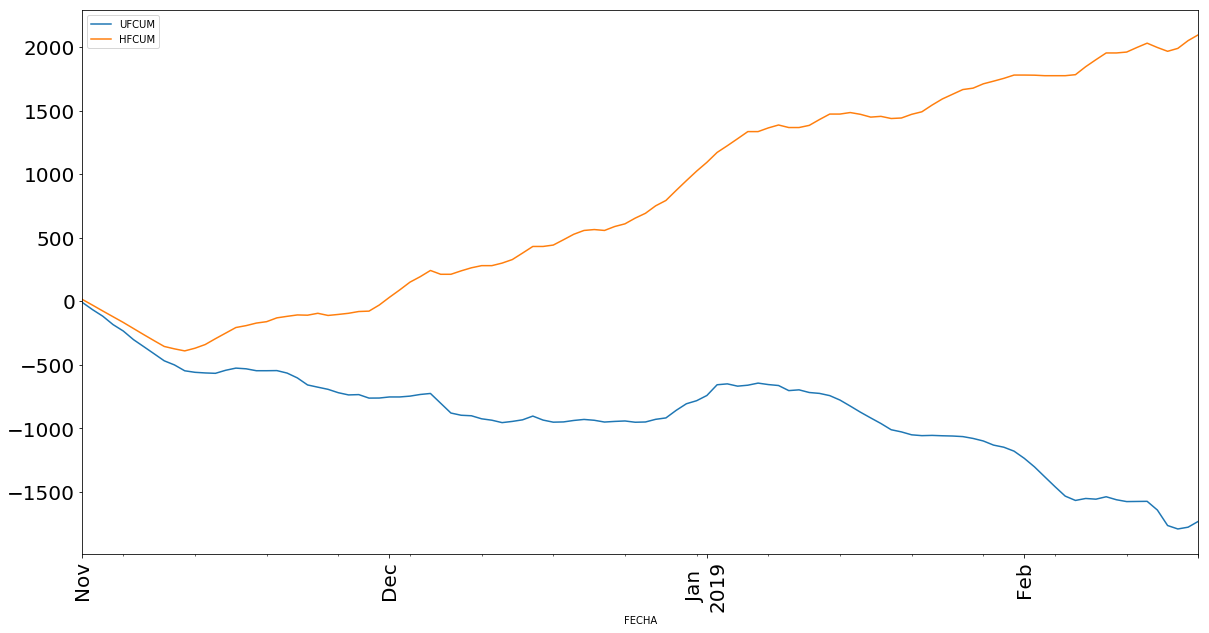

In [47]:
SUMAUF.plot(x="FECHA",y=["UFCUM","HFCUM"],figsize=(20,10),rot=90,fontsize=20)
plt.savefig('HFE_U24_cum',plt=2000)


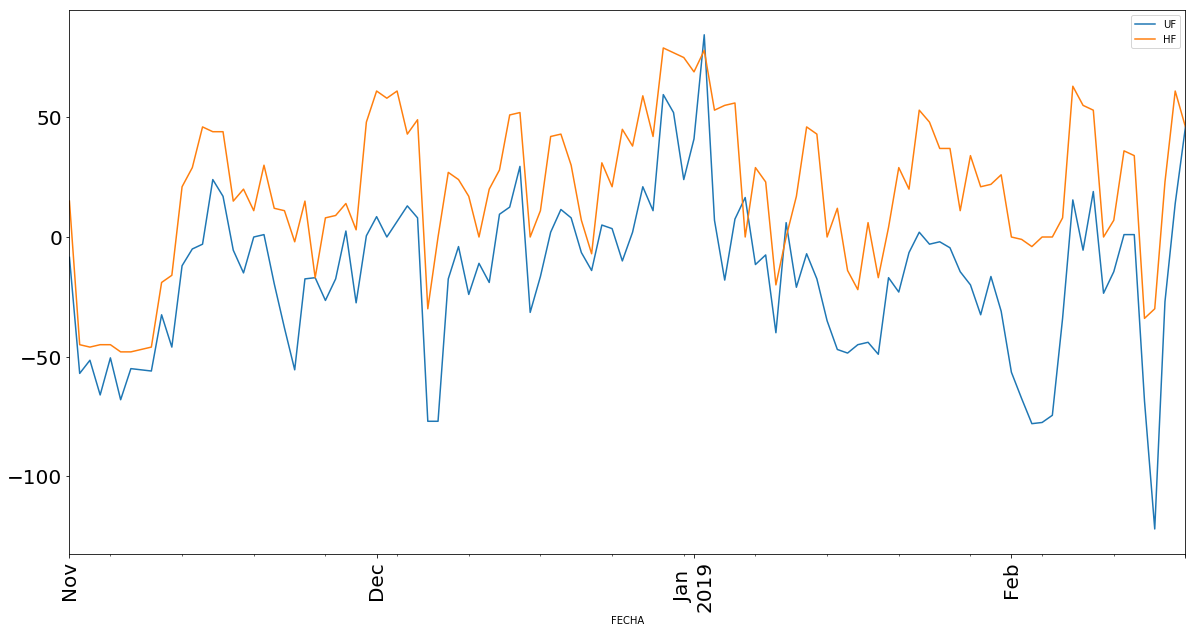

In [46]:
SUMAUF.plot(x="FECHA",y=["UF","HF"],figsize=(20,10),rot=90,fontsize=20)
